## 自動車走行距離の予測
### ＜ガソリン1ガロン当たりの走行距離の予測＞

In [1]:
import numpy as np
import pandas as pd 
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

In [2]:
data = pd.read_csv('predict_of_FuelConsumption.tsv', sep='\t')

In [3]:
data.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


### ＜データの説明＞
- id : インデックスとして使用
- `mpg` : ガソリン1ガロン当たりの走行距離
- cylinders : シリンダーの数
- displacement : 排気量
- horsepower : 馬力
- weight : 重量
- acceleration : 加速度
- model year : 年式
- origin : 起源（origin: 1="USA", 2="Europe", 3="Japan"）
- car name : 車名
<br>

※欠損値あり。ただしNAN形式ではない。

<br>
<br>
<br>



In [4]:
data.isnull().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
data.dtypes

id                int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
data.describe()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,200.170854,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915
std,113.432759,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932
min,0.000000,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000
25%,98.500000,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000
50%,202.000000,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000
75%,294.500000,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000


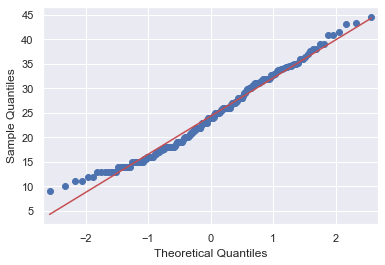

In [7]:
fig = sm.qqplot(data['mpg'], line='s')

(array([ 6., 30., 30., 29., 31., 22., 25., 15.,  7.,  4.]),
 array([ 9.  , 12.56, 16.12, 19.68, 23.24, 26.8 , 30.36, 33.92, 37.48,
        41.04, 44.6 ]),
 <BarContainer object of 10 artists>)

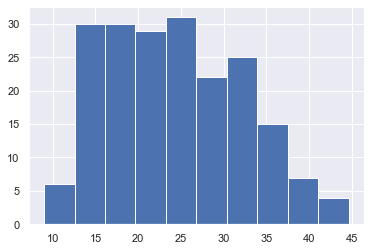

In [8]:
plt.hist(data['mpg'])

In [9]:
def carname(val, Num):
  carname_split = val.split(" ")
  if len(carname_split) > Num:
    ret = carname_split[Num]
  else:
    ret = "Other"
  return ret

In [10]:
data['brand'] = data['car name'].apply(carname, Num=0)
data['brand'].replace("chevroelt","chevrolet",inplace=True)
data['brand'].replace("mercedes","mercedes-benz",inplace=True)
data['brand'].replace("toyouta","toyota",inplace=True)
data['brand'].replace("vokswagen","volkswagen",inplace=True)
data['brand'].replace("vw","volkswagen",inplace=True)
data['brand'].replace("maxda","mazda",inplace=True)
data = data.drop(columns=['car name'])

In [11]:
data.replace("?", np.nan, inplace=True)
data['horsepower'] = data['horsepower'].astype(float)
data['horsepower'] = data.groupby(['cylinders'])['horsepower'].transform(lambda x: x.fillna(x.mean()))

In [12]:
data['origin'] = data['origin'].astype(str)

In [13]:
data = pd.get_dummies(data)
data


,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,...,brand_peugeot,brand_plymouth,brand_pontiac,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_triumph,brand_volkswagen,brand_volvo
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,0,1,...,0,0,0,0,0,0,0,0,1,0
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,0,0,...,0,0,0,0,0,0,1,0,0,0
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,0,...,0,0,0,0,0,0,0,0,0,0
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.0,2110.0,19.2,80,0,0,...,0,0,0,0,0,0,0,0,0,0
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,0,...,0,0,0,0,0,0,0,0,0,0
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,...,0,0,0,0,0,0,0,0,0,0
197,395,43.4,4,90.0,48.0,2335.0,23.7,80,0,1,...,0,0,0,0,0,0,0,0,1,0


In [14]:
# from sklearn.preprocessing import StandardScaler as SC

# scaling_data = ['weight', 'displacement', 'horsepower']
# sc = SC().fit(data[scaling_data])
# scaled_data = pd.DataFrame(sc.transform(data[scaling_data]),columns=scaling_data, index=data.index)
# data.update(scaled_data)
# data

In [15]:
X = data.drop(columns=['id','mpg'])
Y = data['mpg']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [17]:
from sklearn.linear_model import RidgeCV  
from sklearn.metrics import mean_squared_error

In [18]:
n_lambda = 50
ridge_lambdas = np.logspace(-2, 1, n_lambda)
# RidgeCVを使って最適なlambdaでモデルを構築する
model = RidgeCV(cv = 5, alphas = ridge_lambdas, fit_intercept=False)
model.fit(X_train, Y_train)
# 訓練データを指定してモデルを推定する
Y_pred = model.predict(X_test)

In [19]:
#学習データの決定係数
model.score(X_train, Y_train)

0.8553439319897864

In [20]:
# テストデータの決定係数
model.score(X_test, Y_test)

0.7967603336094888

In [23]:
# 汎化誤差の確認
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
rmse

3.343018331952055